In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
epsilon = 0.3
min_samples = 13

In [7]:
# Leer los datos desde el archivo Excel
file_path = 'C:/Users/Álvaro/Desktop/Odd_shape_data.xls'
df = pd.read_excel(file_path)

X = df[['V1', 'V2']].values

In [8]:
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

In [9]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 1


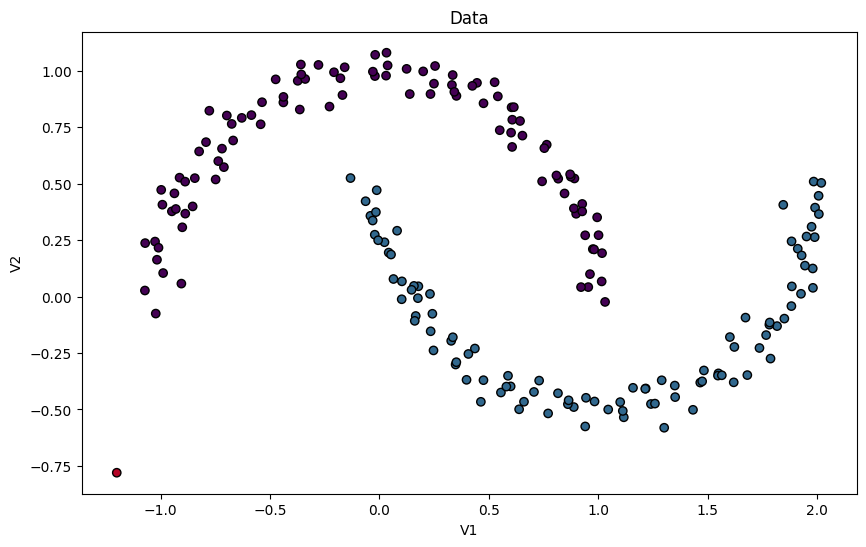

In [10]:
colors = plt.colormaps['viridis']
color_map = list(map(lambda x: '#b40426' if x == -1 else colors(x / no_clusters), labels))

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=color_map, marker="o", edgecolor='k', picker=True)
plt.title('Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [11]:
range_max = len(X)
X = np.array([X[i] for i in range(0, range_max) if labels[i] != -1])
labels = np.array([labels[i] for i in range(0, range_max) if labels[i] != -1])

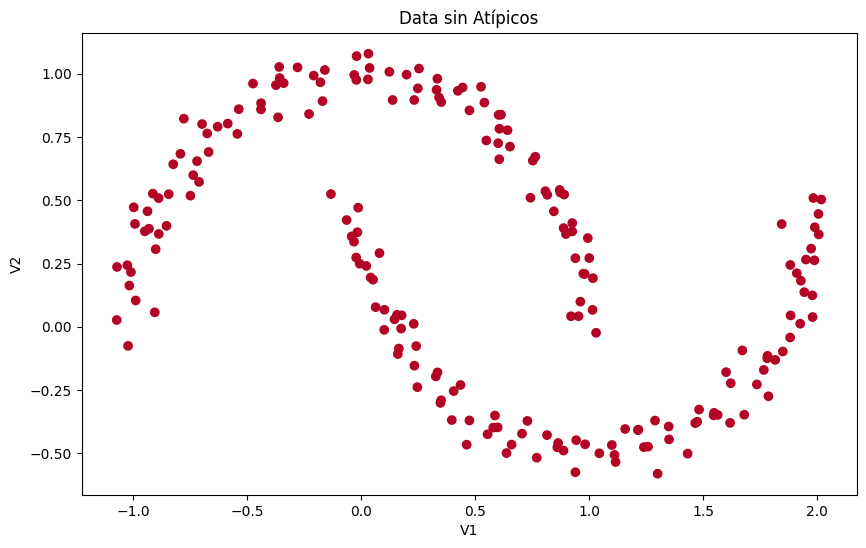

In [12]:
colors = list(map(lambda x: '#000000' if x == -1 else '#b40426', labels))

plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Data sin Atípicos')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()